In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [49]:
# Online Shopper\Classification\Dataset\Engineered\online_shoppers_intention_Engineered.csv

df = pd.read_csv("online_shoppers_intention_Engineered.csv")

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,DislikeRates,TimeSpent
0,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(-0.001, 1.0]",0.000000,0.20,0.20,0.0,0.0,Feb,"(0.999, 2.0]","(0.999, 2.0]","(0.999, 3.0]","(0.999, 2.0]",Returning_Visitor,False,False,100.0,0.000000
1,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(1.0, 2.0]",64.000000,0.00,0.10,0.0,0.0,Feb,"(0.999, 2.0]","(0.999, 2.0]","(0.999, 3.0]","(0.999, 2.0]",Returning_Visitor,False,False,25.0,64.000000
2,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(-0.001, 1.0]",0.000000,0.20,0.20,0.0,0.0,Feb,"(2.0, 8.0]","(0.999, 2.0]","(3.0, 9.0]","(2.0, 3.0]",Returning_Visitor,False,False,100.0,0.000000
3,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(1.0, 2.0]",2.666667,0.05,0.14,0.0,0.0,Feb,"(2.0, 8.0]","(0.999, 2.0]","(0.999, 3.0]","(3.0, 20.0]",Returning_Visitor,False,False,47.5,2.666667
4,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(9.0, 10.0]",627.500000,0.02,0.05,0.0,0.0,Feb,"(2.0, 8.0]","(2.0, 13.0]","(0.999, 3.0]","(3.0, 20.0]",Returning_Visitor,True,False,17.5,627.500000


In [50]:
drop_features_duration = []
drop_features_rates = ["BounceRates", "ExitRates"]
drop_features_other = ["SpecialDay"]

for column in df.columns:
    if "_Duration" in column or "Spent" in column:
        drop_features_duration.append(column)
        
df["Weekend"] = df["Weekend"].astype(str)

print(drop_features_duration)

['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'TimeSpent']


In [51]:
df = df.drop(columns=drop_features_duration)
df = df.drop(columns=drop_features_rates)
df = df.drop(columns=drop_features_other)

df.head()

,Administrative,Informational,ProductRelated,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,DislikeRates
0,"(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]",0.0,Feb,"(0.999, 2.0]","(0.999, 2.0]","(0.999, 3.0]","(0.999, 2.0]",Returning_Visitor,False,False,100.0
1,"(-0.001, 1.0]","(-0.001, 2.0]","(1.0, 2.0]",0.0,Feb,"(0.999, 2.0]","(0.999, 2.0]","(0.999, 3.0]","(0.999, 2.0]",Returning_Visitor,False,False,25.0
2,"(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]",0.0,Feb,"(2.0, 8.0]","(0.999, 2.0]","(3.0, 9.0]","(2.0, 3.0]",Returning_Visitor,False,False,100.0
3,"(-0.001, 1.0]","(-0.001, 2.0]","(1.0, 2.0]",0.0,Feb,"(2.0, 8.0]","(0.999, 2.0]","(0.999, 3.0]","(3.0, 20.0]",Returning_Visitor,False,False,47.5
4,"(-0.001, 1.0]","(-0.001, 2.0]","(9.0, 10.0]",0.0,Feb,"(2.0, 8.0]","(2.0, 13.0]","(0.999, 3.0]","(3.0, 20.0]",Returning_Visitor,True,False,17.5


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Administrative    12330 non-null  object 
 1   Informational     12330 non-null  object 
 2   ProductRelated    12330 non-null  object 
 3   PageValues        12330 non-null  float64
 4   Month             12330 non-null  object 
 5   OperatingSystems  12330 non-null  object 
 6   Browser           12330 non-null  object 
 7   Region            12330 non-null  object 
 8   TrafficType       12330 non-null  object 
 9   VisitorType       12330 non-null  object 
 10  Weekend           12330 non-null  object 
 11  Revenue           12330 non-null  bool   
 12  DislikeRates      12330 non-null  float64
dtypes: bool(1), float64(2), object(10)
memory usage: 1.1+ MB


In [53]:
df.describe()

,PageValues,DislikeRates
count,12330.000000,12330.000000
mean,5.889258,16.316045
std,18.568437,23.737475
min,0.000000,0.000000
25%,0.000000,3.953208
50%,0.000000,7.925522
75%,0.000000,16.270863
max,361.763742,100.000000


In [54]:
object_features = []

for column in df.columns:
    if df[column].dtype != "float64" and column != "Revenue":
        object_features.append(column)
        
object_features

['Administrative',
 'Informational',
 'ProductRelated',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [55]:
df = pd.get_dummies(df, columns = object_features, drop_first = True)

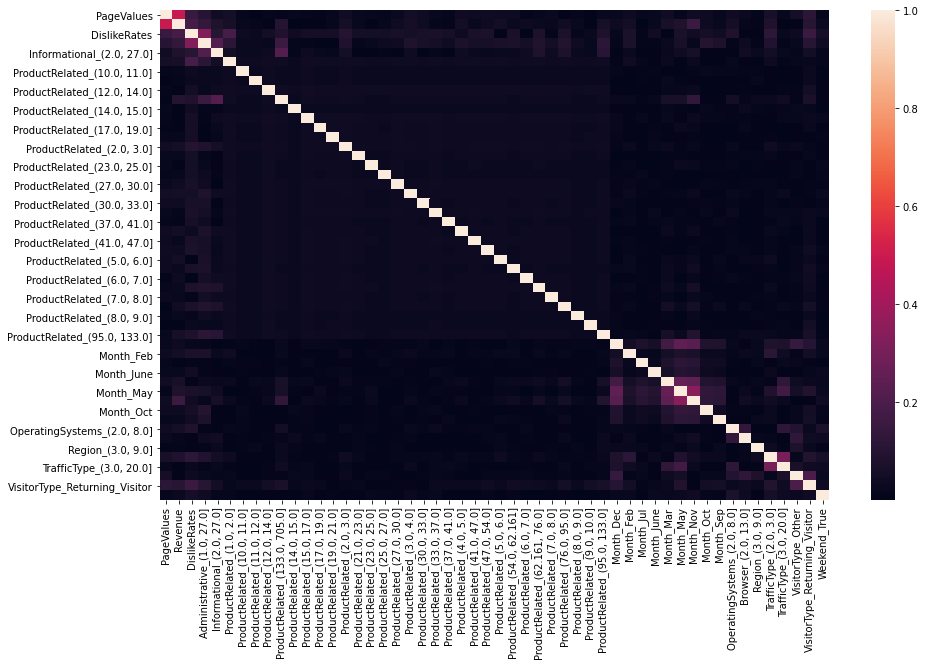

In [56]:
fig, ax = plt.subplots(figsize=(15,9))

sns.heatmap(abs(df.corr()))

In [57]:
corr = df.corr()

multicor = {}

for column in corr.columns:
    for index in corr.index:
        if corr.loc[index][column] > 0.3 and corr.loc[index][column] != 1.0:
            multicor[(index, column)] = corr.loc[index][column]
            
multicor

{('PageValues', 'Revenue'): 0.49256929525114634,
 ('Revenue', 'PageValues'): 0.49256929525114634}

# Modelling

In [58]:
X = df.drop(columns=["Revenue"])
Y = df["Revenue"]

In [59]:
X.head()

,PageValues,DislikeRates,"Administrative_(1.0, 27.0]","Informational_(2.0, 27.0]","ProductRelated_(1.0, 2.0]","ProductRelated_(10.0, 11.0]","ProductRelated_(11.0, 12.0]","ProductRelated_(12.0, 14.0]","ProductRelated_(133.0, 705.0]","ProductRelated_(14.0, 15.0]","ProductRelated_(15.0, 17.0]","ProductRelated_(17.0, 19.0]","ProductRelated_(19.0, 21.0]","ProductRelated_(2.0, 3.0]","ProductRelated_(21.0, 23.0]","ProductRelated_(23.0, 25.0]","ProductRelated_(25.0, 27.0]","ProductRelated_(27.0, 30.0]","ProductRelated_(3.0, 4.0]","ProductRelated_(30.0, 33.0]","ProductRelated_(33.0, 37.0]","ProductRelated_(37.0, 41.0]","ProductRelated_(4.0, 5.0]","ProductRelated_(41.0, 47.0]","ProductRelated_(47.0, 54.0]","ProductRelated_(5.0, 6.0]","ProductRelated_(54.0, 62.161]","ProductRelated_(6.0, 7.0]","ProductRelated_(62.161, 76.0]","ProductRelated_(7.0, 8.0]","ProductRelated_(76.0, 95.0]","ProductRelated_(8.0, 9.0]","ProductRelated_(9.0, 10.0]","ProductRelated_(95.0, 133.0]",Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,"OperatingSystems_(2.0, 8.0]","Browser_(2.0, 13.0]","Region_(3.0, 9.0]","TrafficType_(2.0, 3.0]","TrafficType_(3.0, 20.0]",VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.0,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0
3,0.0,47.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,0.0,17.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1


In [60]:
Y.head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

## Train Test Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

mlp_nn = MLPClassifier()
mlp_nn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [62]:
mlp_nn_test_score = mlp_nn.score(X_test, y_test)
mlp_nn_train_score = mlp_nn.score(X_train, y_train)
mlp_nn_bias = abs(mlp_nn_train_score- mlp_nn_test_score)

print(f"MLP Neural Network Train Score : {mlp_nn_train_score}")
print(f"MLP Neural Network Test Score : {mlp_nn_test_score}")
print(f"MLP Neural Network Bias : {mlp_nn_bias}")

MLP Neural Network Train Score : 0.9438324658031715
MLP Neural Network Test Score : 0.8908822806586385
MLP Neural Network Bias : 0.05295018514453298


In [63]:
random_probs = [0 for _ in range(len(y_test))]
mlp_nn_probs = mlp_nn.predict_proba(X_test)[:, 1]

random_auc = roc_auc_score(y_test, random_probs)
mlp_nn_auc = roc_auc_score(y_test, mlp_nn_probs)

print(f"Auc random : {round(random_auc * 100)}")
print(f"Auc MLP Neural Network : {round(mlp_nn_auc*100)}")

Auc random : 50
Auc MLP Neural Network : 92


In [64]:
random_probs = [0 for _ in range(len(y_test))]
mlp_nn_probs = mlp_nn.predict_proba(X_test)[:, 1]

random_auc = roc_auc_score(y_test, random_probs)
mlp_nn_auc = roc_auc_score(y_test, mlp_nn_probs)

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
mlp_nn_fpr, mlp_nn_tpr, _ = roc_curve(y_test, mlp_nn_probs)

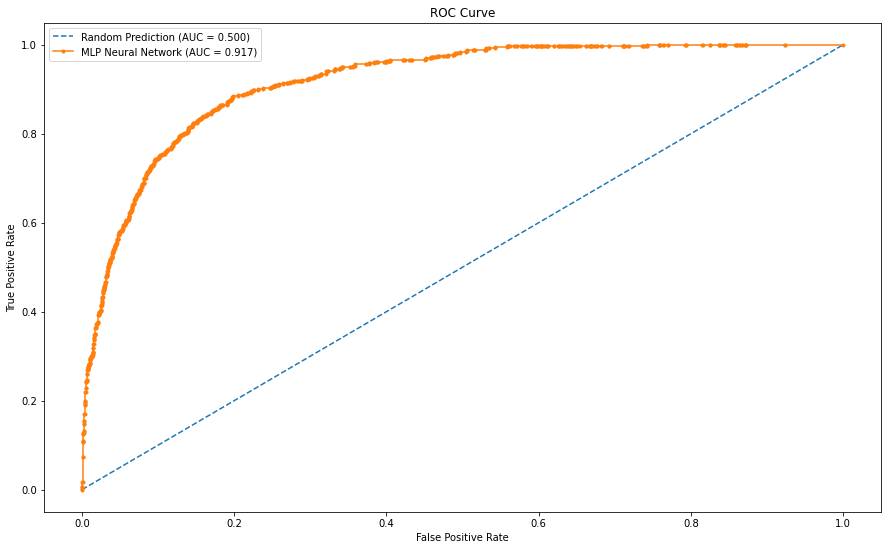

In [65]:
fig, ax = plt.subplots(figsize=(15, 9))

plt.plot(random_fpr, random_tpr, linestyle="--", label="Random Prediction (AUC = %0.3f)"%random_auc)
plt.plot(mlp_nn_fpr, mlp_nn_tpr, marker=".", label="MLP Neural Network (AUC = %0.3f)"%mlp_nn_auc)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()

plt.show()

## KFold

In [66]:
N = 5
skf = StratifiedKFold(n_splits=N, random_state=42, shuffle=True)
mlp_nn = MLPClassifier()

mlp_nn_test_scores = np.array([])
mlp_nn_train_scores = np.array([])

for fold, (trn_idx, val_idx) in enumerate(skf.split(X, Y), 1):
    print(f"Fold {fold}\n-------------------------------------")
    
    mlp_nn.fit(X.iloc[trn_idx], Y.iloc[trn_idx])

    mlp_nn_train_score = mlp_nn.score(X.iloc[trn_idx], Y.iloc[trn_idx])
    mlp_nn_test_score = mlp_nn.score(X.iloc[val_idx], Y.iloc[val_idx])
    mlp_nn_bias = abs(mlp_nn_train_score - mlp_nn_test_score)

    mlp_nn_test_scores = np.append(mlp_nn_test_scores, mlp_nn_test_score)
    mlp_nn_train_scores = np.append(mlp_nn_train_scores, mlp_nn_train_score)
    
    print(f"MLP Neural Network Train Score : {mlp_nn_train_score}")
    print(f"MLP Neural Network Test Score : {mlp_nn_test_score}")
    print(f"MLP Neural Network Bias : {mlp_nn_bias}\n-------------------------------------")

mlp_nn_mean_test_score = mlp_nn_test_scores.mean()
mlp_nn_mean_train_score = mlp_nn_train_scores.mean()
mlp_nn_mean_bias = abs(mlp_nn_mean_train_score - mlp_nn_mean_test_score)

print("Mean Scores and Bias\n-------------------------------------")
    
print(f"MLP Neural Network Train Score : {mlp_nn_mean_train_score}")
print(f"MLP Neural Network Test Score : {mlp_nn_mean_test_score}")
print(f"MLP Neural Network Bias : {mlp_nn_mean_bias}")

Fold 1
-------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Neural Network Train Score : 0.9396796431467964
MLP Neural Network Test Score : 0.8953771289537713
MLP Neural Network Bias : 0.04430251419302511
-------------------------------------
Fold 2
-------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Neural Network Train Score : 0.9327858880778589
MLP Neural Network Test Score : 0.8868613138686131
MLP Neural Network Bias : 0.04592457420924578
-------------------------------------
Fold 3
-------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Neural Network Train Score : 0.9349148418491484
MLP Neural Network Test Score : 0.8864557988645579
MLP Neural Network Bias : 0.04845904298459047
-------------------------------------
Fold 4
-------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Neural Network Train Score : 0.9367396593673966
MLP Neural Network Test Score : 0.8828061638280617
MLP Neural Network Bias : 0.05393349553933491
-------------------------------------
Fold 5
-------------------------------------
MLP Neural Network Train Score : 0.9390713706407137
MLP Neural Network Test Score : 0.883617193836172
MLP Neural Network Bias : 0.05545417680454168
-------------------------------------
Mean Scores and Bias
-------------------------------------
MLP Neural Network Train Score : 0.9366382806163829
MLP Neural Network Test Score : 0.8870235198702352
MLP Neural Network Bias : 0.04961476074614768


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
